In [18]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.cluster import DBSCAN


# Step 1: Loading dataset from UCI repository using URL
wholesale_cust_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')

wholesale_cust_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [19]:
# Checking the size of the dataset
print ("Wholesale customers dataset has {} samples with {} features each.".format(*wholesale_cust_data.shape))

Wholesale customers dataset has 440 samples with 8 features each.


In [20]:
# Data Exploration 
wholesale_cust_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [21]:
# Step 2: Data Pre-processing

# check for missing values
print(wholesale_cust_data.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [22]:
# normalizing the data

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(wholesale_cust_data), columns=wholesale_cust_data.columns)

pd.DataFrame(df_normalized).describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#Step 3: Deploy the DBSCAN algorithm.

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_normalized)

# Add cluster labels to the DataFrame
wholesale_cust_data['DBSCAN_Cluster'] = dbscan.labels_

In [24]:
# Step 4: Evaluate the clustering results.

dbscan_silhouette = silhouette_score(df_normalized, dbscan.labels_)

print("Silhouette Coefficients for DBSCAN:", dbscan_silhouette)

Silhouette Coefficients for DBSCAN: 0.6360287841835186


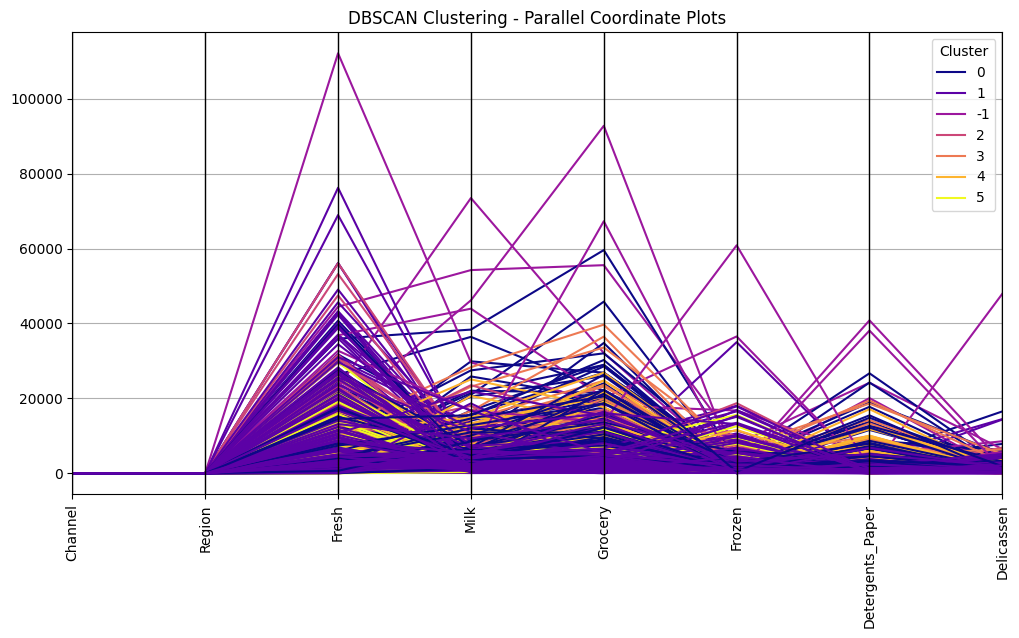

In [25]:
# Step 5: Visualize the clusters.

plt.figure(figsize=(12, 6))
parallel_coordinates(wholesale_cust_data, 'DBSCAN_Cluster', colormap='plasma')
plt.xticks(rotation=90)
plt.title('DBSCAN Clustering - Parallel Coordinate Plots')
plt.legend(title='Cluster')
plt.show()
